<a href="https://colab.research.google.com/github/sauravrox/movie-genre-actor-prediction/blob/main/Movie_Genre_and_Actor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a basic project where a Sequential model is developed which predicts the movie genre by taking the movie poster as input. It also shows the actor name according to the trained data. If the face is not recognised, it shows 'Unknown Person'.

The model has been trained with only 1500 rows. For more accuracy, train data should be increased.

The train file consists of 27 columns where the points are given to each of the genre.

Training is provided to the model by providing the file that is poster name and the points to each genre it belongs to.

The face recognition is done by using the called module face_recognition. This can also be done in a custom way.

In [ ]:
# First, lets import basic required packages. If they are not offered by default, lets install them using the command !pip install {package}

In [ ]:
import os
!pip install face_recognition
import face_recognition
import tensorflow.keras as tf
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, validation_curve, GridSearchCV

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
# Lets connect this notebook with our google drive for file import

In [ ]:
# movie poster
from google.colab import drive
drive.mount("/content/gdrive")

data = pd.read_csv('/content/gdrive/MyDrive/Movies-Poster/train2.csv', encoding='latin-1')
print(data.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(1500, 27)


In [ ]:
print(data)
img_width = 350
img_height = 350

             Id                                Genre  ...  War  Western
0     tt0086425                  ['Comedy', 'Drama']  ...    0        0
1     tt0085549        ['Drama', 'Romance', 'Music']  ...    0        0
2     tt0086465                           ['Comedy']  ...    0        0
3     tt0086567               ['Sci-Fi', 'Thriller']  ...    0        0
4     tt0086034  ['Action', 'Adventure', 'Thriller']  ...    0        0
...         ...                                  ...  ...  ...      ...
1495  tt0104231    ['Adventure', 'Drama', 'Romance']  ...    0        0
1496  tt0104437    ['Adventure', 'Comedy', 'Family']  ...    0        0
1497  tt0104452                ['Comedy', 'Romance']  ...    0        0
1498  tt0104070                ['Comedy', 'Fantasy']  ...    0        0
1499  tt0105699       ['Crime', 'Drama', 'Thriller']  ...    0        0

[1500 rows x 27 columns]


In [ ]:
X = []

for i in tqdm(range(data.shape[0])):
    dir = "/content/gdrive/MyDrive/Movies-Poster/Images/"
    # print(data['Id'][i])
    filename = str(data['Id'][i]) + ".jpg"
    path = os.path.join(dir, filename)
    # if os.path.exists (path):
    img = image.load_img(path, target_size = (img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

100%|██████████| 1500/1500 [00:05<00:00, 281.98it/s]


(1500, 350, 350, 3)


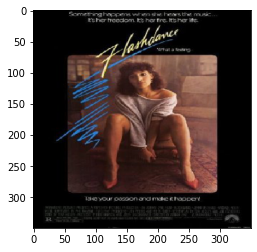

In [ ]:
X = np.array(X)
# y = np.array(y)
print(X.shape)

plt.imshow(X[1])

In [ ]:
y = data.drop(['Id','Genre'], axis = 1)
y = y.to_numpy()
y.shape


(1500, 25)

In [ ]:
# Lets split the data as train and test data. The test data is set as 15% currenty.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [ ]:
# Here a model is being developed with 4 layers. We can increase and decrease them according to our need.
# More on the Sequential model can be found here on my blog - https://saurabadhikari.com.np/keras-sequential-model/

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_8 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 86, 86, 32)       

In [ ]:
# Here the model is fit on 3 epochs. The number of epochs can also be increased and decreased according to the need. We should also be careful with over-fitting and under-fitting
# of the model with fitting them.

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
40/40 [==============================] - 5s 116ms/step - loss: 1.4153 - accuracy: 0.1945 - val_loss: 0.6195 - val_accuracy: 0.1733
Epoch 2/3
40/40 [==============================] - 4s 105ms/step - loss: 0.6799 - accuracy: 0.2314 - val_loss: 0.7093 - val_accuracy: 0.1600
Epoch 3/3
40/40 [==============================] - 4s 106ms/step - loss: 0.5772 - accuracy: 0.2753 - val_loss: 1.0406 - val_accuracy: 0.1733


In [ ]:
# Lets provide the input image to predict the genre

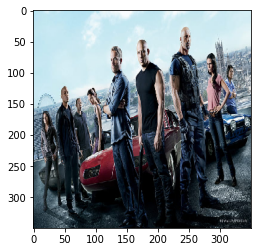

In [ ]:
#Testing of Model
img = image.load_img("/content/gdrive/MyDrive/Movies-Poster/fast.jpg", target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

In [ ]:
# Lets reshape the image

In [ ]:
img = img.reshape(1, img_width, img_height, 3)

In [ ]:
# Here the list of trained genre is displayed

In [ ]:
classes = data.columns[2:]
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# Lets predict the genre of the given image

In [ ]:
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

In [ ]:
# The predict genre of the given image is 'Drama, Action and Romance'

In [ ]:
for i in range(3):
    print(classes[top3[i]])

Drama
Action
Romance


In [ ]:
# Now, lets go for the face recognition from the given poster image

In [ ]:
# #movie poster
import os
from PIL import Image, ImageDraw
files = []
MYDIR = '/content/gdrive/MyDrive/celebrity-faces/train/'

In [ ]:
# Here, we have altogether 4 actors having multiple images for each of these actors in separate folders. Please note 'dwyane_johnson' in the given folders.

In [ ]:
folder_names = []
file_names = []
for entry_name in os.listdir(MYDIR):
    entry_path = os.path.join(MYDIR, entry_name)
    print(entry_path)
    if os.path.isdir(entry_path):
        folder_names.append(entry_name)

print(folder_names)

/content/gdrive/MyDrive/celebrity-faces/train/jerry_seinfeld
/content/gdrive/MyDrive/celebrity-faces/train/robert_downey
/content/gdrive/MyDrive/celebrity-faces/train/ben_afflek
/content/gdrive/MyDrive/celebrity-faces/train/dwyane_johnson
['jerry_seinfeld', 'robert_downey', 'ben_afflek', 'dwyane_johnson']


In [ ]:
# Here face encoding is carried out for all the images using face_recognition module. These encoding values are later on matched on the given poster and hence face is recognised

In [ ]:
for x in folder_names:
    known_face_names = [x]
    newdir = MYDIR+x
    for file_name in os.listdir(newdir):
        file_path = os.path.join(newdir, file_name)
        image_of_bill = face_recognition.load_image_file(file_path)
        bill_face_encoding = face_recognition.face_encodings(image_of_bill)[0]
        known_face_encodings = [bill_face_encoding]

In [ ]:
# Loading the poster again. This step can be discarded

In [ ]:
#load test image to find faces
test_image = face_recognition.load_image_file('/content/gdrive/MyDrive/Movies-Poster/fast.jpg')

In [ ]:
#find faces in test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

In [ ]:
pil_image = Image.fromarray(test_image)
#create ImageDraw instance
draw = ImageDraw.Draw(pil_image)

In [ ]:
# Here, the face is marked in the given poster image if matching is found

In [ ]:
for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown Person"
    if True in matches:
      first_match_index = matches.index(True)
      name = known_face_names[first_match_index]

    #Draw Box
    draw.rectangle(((left, top),(right, bottom)), outline = (0,0,0))

    #Draw label
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0,0,0), outline=(0,0,0))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

In [ ]:
# We had only given images of 'Dwayne Johnson' above and hence the photo of 'Dwayne Johnson' has been recognised below

<PIL.Image.Image image mode=RGB size=728x485 at 0x7F591C8A0F10>


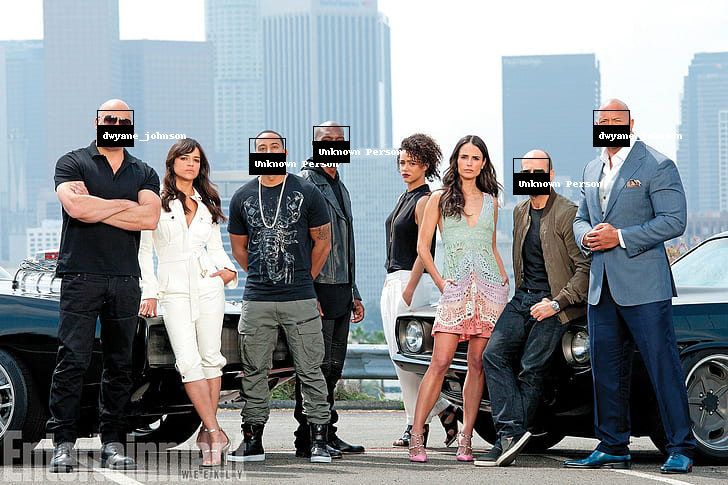

In [ ]:
# del draw
#display image
print(pil_image)
display(pil_image)